# Business Understanding 
The aim of this analysis is to answer the following questions:
1. What's the popular movie ?
2. What's the highest budget for movie ?
3. What's the highest Revenued of genres movies ?
4. What's the most profitable movie?


In [244]:
#import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

# Data Understanding


In [245]:
#Read in the dataset and take a look at the first few rows here:
df = pd.read_csv(r'C:\Users\USER\PJ1\tmdb-movies.csv')

In [246]:
#Find the number of rows and columns in the dataset.
df.shape

(10866, 21)

In [247]:
#Use .info() and .describe() to get some insights:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Preparation:
This section will be used to prepare and clean the data for further analysis.

In [248]:
#drop unwanted columns: 
df.drop(['id','imdb_id','cast','homepage','tagline','overview','keywords','production_companies'],axis = 1, inplace= True)


In [249]:
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [250]:
#How many missing values in the dataset? 
df.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [251]:
#drop null values
df = df.dropna()

In [252]:
df.isna().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [253]:
#splitting genres column:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

## Answring Question

## Question 1: What's the popular movie ?

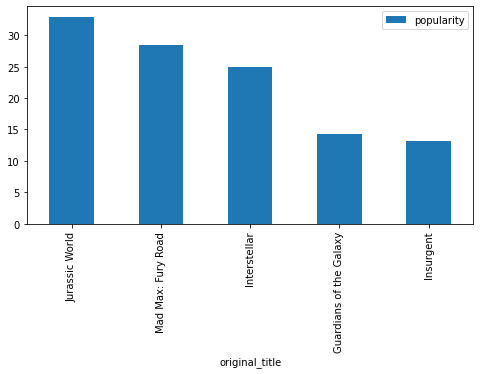

In [296]:
pop = df.groupby("original_title", as_index=False)['popularity'].sum().sort_values(by="popularity",ascending=False)
pop= pop.head(5)
pop.plot.bar(x='original_title', y='popularity', figsize=(8,4));

Finding: Jurassic world is most popular movie

## Question 2: What's the highest budget for movie ?


<AxesSubplot:xlabel='original_title'>

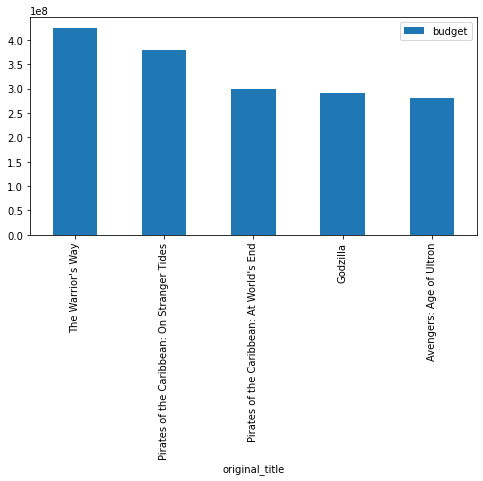

In [305]:
bud = df.groupby("original_title", as_index=False)['budget'].sum().sort_values(by="budget",ascending=False)
bud= bud.head(5)
bud.plot.bar(x="original_title", y='budget',figsize=(8,4), )


Finding: The Warrior's Way is the highist budget with cost of 425M

## Question 3: What's the highest Revenued of genres movies ?

<AxesSubplot:xlabel='genres'>

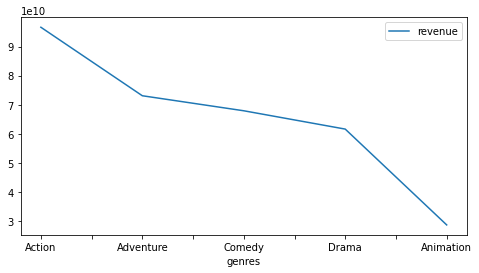

In [297]:
gn = df.groupby("genres", as_index=False)['revenue'].sum().sort_values(by="revenue",ascending=False)
gn= gn.head(5)
gn.plot.line( x="genres", y='revenue',figsize=(8,4))

Finding: Action movies are the highest revenue

## Question 4: What's the most profitable movie?

In [257]:
df['Profit']=df['budget']-df['revenue']

In [258]:
res=df[['original_title' , 'Profit']].sort_values('Profit', ascending=False).head()
res

,original_title,Profit
2244,The Warrior's Way,413912431
5508,The Lone Ranger,165710090
2069,The Wolfman,150000000
2214,The Pacific,120000000
7031,The Alamo,119180039


<AxesSubplot:xlabel='original_title', ylabel='Profit'>

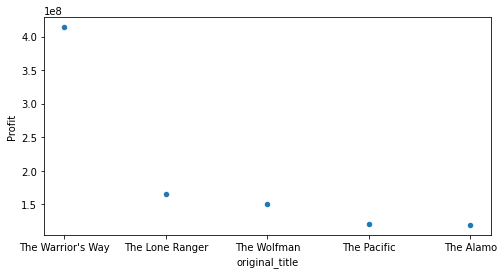

In [298]:
res.plot.scatter(x="original_title", y='Profit' ,figsize=(8,4))

Finding: The Warrior's Way is the highist profit